# Implementación de la QFT para 4 cubits

In [33]:
from pytket import Circuit
from pytket.backends.ibm import AerStateBackend
from qiskit.visualization import plot_bloch_multivector

c = Circuit(4)  # define a circuit with 4 qubits and 4 bits

##inicializo los cubits a |0110>


##QFT

c.H(0) 
c.CRz(0.5, 0, 1) 
c.CRz(0.25, 0, 2)
c.CRz(0.125, 0, 3)
c.add_barrier([0, 1, 2, 3])

c.H(1) 
c.CRz(0.5, 1, 2)
c.CRz(0.25, 1, 3)
c.add_barrier([0, 1, 2, 3])

c.H(2) 
c.CRz(0.5, 2, 3)
c.add_barrier([0, 1, 2, 3])

c.H(3)

backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
print(state.round(5))

# c.measure_all()  # measure qubits 0 and 1, recording the results in bits 0 and 1
# b = AerBackend()                # connect to the backend
# b.compile_circuit(c)            # compile the circuit to satisfy the backend's requirements
# handle = b.process_circuit(c, 1000)  # submit the job to run the circuit 100 times
# counts = b.get_result(handle).get_counts()   # retrieve and summarise the results
# print(counts)
# 

[ 0.25   +0.j       0.25   +0.j       0.17678-0.17678j  0.17678-0.17678j
  0.09567-0.23097j  0.09567-0.23097j -0.09567-0.23097j -0.09567-0.23097j
  0.04877-0.2452j   0.04877-0.2452j  -0.13889-0.20787j -0.13889-0.20787j
 -0.20787-0.13889j -0.20787-0.13889j -0.2452 +0.04877j -0.2452 +0.04877j]


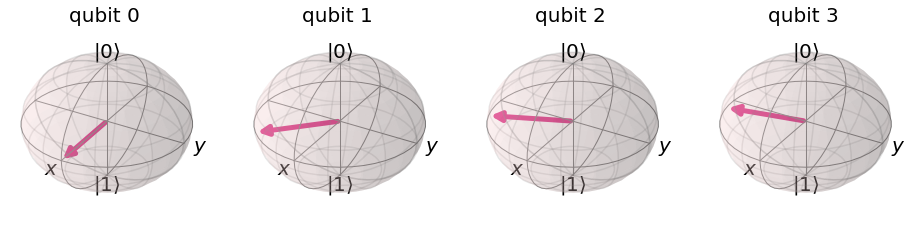

In [34]:
plot_bloch_multivector(state)

In [42]:
from pytket import Circuit
from pytket.backends.ibm import AerStateBackend
from qiskit.visualization import plot_bloch_multivector

c = Circuit(2)  # define a circuit with 4 qubits and 4 bits

##inicializo los cubits a |0110>

c.X(0)
c.X(1)


##QFT

c.H(0) 
c.CRz(0.5, 0, 1) 

c.H(1) 


backend = AerStateBackend()
backend.compile_circuit(c)

handle = backend.process_circuit(c)
state = backend.get_result(handle).get_state()
print(state.round(5))

# c.measure_all()  # measure qubits 0 and 1, recording the results in bits 0 and 1
# b = AerBackend()                # connect to the backend
# b.compile_circuit(c)            # compile the circuit to satisfy the backend's requirements
# handle = b.process_circuit(c, 1000)  # submit the job to run the circuit 100 times
# counts = b.get_result(handle).get_counts()   # retrieve and summarise the results
# print(counts)
# 

[ 0.5    -0.j      -0.5    +0.j      -0.35355-0.35355j  0.35355+0.35355j]


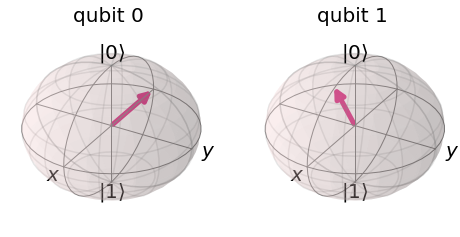

In [43]:
plot_bloch_multivector(state)

# Implementación de la AQFT para 4 cubits y 2 rotaciones